# **Introduction**

Welcome to the world of Molecular Dynamics! This lesson is to teach you the basic protocol of analyzing a molecular dynamics (MD) simulation, including a bit of Python coding. If you don't know how to code, don't worry! These lessons assume no prior knowledge of code or Python.

If you have not completed Step 1 and would like to do so, click this link: https://colab.research.google.com/drive/1vKxP4MJhdIODzScluSeU73NHOWwJIPn8?usp=sharing

## Analyzing molecular dynamics
MD simulates the motion of molecules and can describe how the structure changes over time. The analysis of molecular dynamics extracts properties from the "movie" of the molecule such as how mobile areas of the molecule were and how the pKa values of certain functional groups can vary as the molecule moves. This information can help describe the mechanism of action as conformational changes in enzymes are linked to catalytic activity and pKa is related to nucleophilicty.

## What will I get from this Colab?
The first steps of the colab show whether the molecule reached equilibrium during the simulation, which indicates how reliable or confidently you can interpret the rest of the values. The second section of the Colab describes which areas of the molecule are most dynamic. Finally, the code will calculate the pKa values for each frame of the simulation to show pKa values over time. These values and outputs can be compared to simulations of mutants or the protein with ligands to determine how these changes to the simulation environment alter the dynamics of the molecule.

[Guide video for using this colab](https://www.loom.com/share/cb783e87ba294bee916d0fd1e0847fee?sid=ac7a0852-00c7-4cc9-b2b1-cd142ee9b7fc)



---

This document has a list of [Frequently Asked Questions](https://docs.google.com/document/d/1kzkOi1T6QYjcyIoMXpU114B15WE0VcGnof5xvG5zdvA/edit?usp=sharing), reach out to your instructor if you have additional questions.


####**Please make a copy of this colab for your personal use!!**

A few things to start:

1.   These lessons only work in Google Chrome
2.   If you want to save your progress, go to File> Save a Copy in Drive; then locate a spot in your Drive folder
3.   Clicking the "play" button to the top left of a code block runs the code. Sometimes you can see the code and interact with it. However, if the code is hidden  it is to run adminstrative tasks in the background and you do not need to worry unless you are interested.
4. Sometimes the code may be hidden from view. To view it, click the '>' on the left of the title, until it changes to 'v'. This will reveal the code in that line.

Here are the files you will need for this code to run:
*   **.dcd** is a file format that store simulation trajectories. Simulation trajectories are a dynamic view of various properties in your protein, including atom coordinates, box size, velocities, and forces. Trajectory files looks at these variables as they change throughout time. You should have this file from your MD run in step 1.
*  A **.pdb** file containing a set of atomic coordinates of your molecule. **.pdb** stands for a Protein Data Bank file. It is a file containing the three-dimensional structural data of your protein directly from the Protein Data Bank. If you run into errors with your PDB file, ask your instructor. You should have this file from your MD run in step 1.

If you want to remove waters from your files (you may want this if you did not use the Step 1 colab), you will need a .prmtop file:
*  **.prmtop** is the topology of your protein. Toplogy means how the atoms connect together and the location of each atom. You should have this file from Step 1.

If you would like a tutorial on Python basics, please reference [this colab](https://colab.research.google.com/drive/1UVupXh23ArJp2F9vqTmkVh0JnjEaemi1?usp=sharing ). It is not necessary to do this, however if you are interested in learning more about coding it is a great resource to use!

This should take approximately 30 minutes to run.

---

**Acknowledgments**
- Colab developed by **Angela Kayll, Angelina Sardelli, and Christopher Berndsen** at James Madison University (ver 2 2025) with input and feedback from students in CHEM260 and members of the [MCC community](https://www.mdhcures.org/).

Ver 1 of this colab is available [here](https://colab.research.google.com/drive/1gsqVx570FsOm7-aDZNslvHc4Kkq2Gp1v?usp=sharing)


In [14]:
#@title **1a. Install Conda Colab**
#@markdown Press PLAY. It will restart the kernel (session), don't worry. But do not start
#@markdown any other cells until this one finishes!
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [1]:
#@title **1b. Install and load dependencies**
#@markdown Press PLAY **after** the above cell has completed and the session restarted.
#@markdown This will take a few minutes.
!pip install -q mdtraj
!pip install -q matplotlib
!pip install --upgrade MDAnalysis --quiet
!pip install -q pandas
!pip install -q seaborn
!pip install -q propkatraj

import pandas as pd
import mdtraj as md
import matplotlib.pyplot as pp
import MDAnalysis as mda
import os
from MDAnalysis.analysis import rms, align, diffusionmap
import seaborn as sns
from propkatraj import PropkaTraj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 141.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 135.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
# Load Google Drive
#@title ### **1c. Import Google Drive**
#@markdown Click PLAY to make your Google Drive accessible.
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


Once both of the above have run, *then* you can begin analyzing the trajectory.

1.   Click on the file folder on the left side
2.   **Right-click**, bring up the actions menu, and create a folder. Name this folder "data".
3. Upload the .dcd file and the .pdb file. Put these files in the "data" folder. The .dcd files are often large so be patient.
4.   **Right-click**, bring up the actions menu, and create a folder. Name this folder "outputs". This is where we will put any output files or figures. **Remember to download all of these files when done.**
5.  I'll provide instructions on the basic commands and analyses, if you add more remember to save what you are doing.






---

## **1d. Loading your simulation files**

At this point, you should have all libraries and dependencies installed and all necessary input files already in your Google Drive folder. This is what you did in the last section! Now, you will upload the file that describes the structure of your protein. This file is called a .pdb file.

Below, you should provide the names of all input files and the pathway of your Google Drive folder containing them.

*   **PDB_file_name** is the name of your _nw .pdb file. Add the name where it says "xxx". Make sure there are no extra spaces in the file name!
*   **DCD_file_name** is the name of your _nw .dcd file. Add the name where it says "xxx". Make sure there are no extra spaces in the file name!
*  **Google_Drive_path** is where your simulation files are. After MyDrive/, paste the name of your folder where the "xxx" is. Make sure there are no spaces in the folder name!

When you are ready, press PLAY.

**If this code has run successfully, you should see a new folder in the directory called outputs**

In [3]:
#@title Please provide the necessary input information below:
#@markdown Please reference the text box above for instructions regarding file name inputs and directories.
%%capture
PDB_file_name = 'parametersmimic_nw.pdb' #@param {type:"string"}
DCD_file_name = 'parametersmimic1-1_nw.dcd' #@param {type:"string"}
file_name = PDB_file_name
Google_Drive_Path = '/content/drive/MyDrive/lastproject' #@param {type:"string"}
workDir = Google_Drive_Path

# make the outputs directory
!mkdir -p $workDir/outputs

# connect to MDAnalysis
dcd =  os.path.join(workDir, str(DCD_file_name))
pdb = os.path.join(workDir, str(PDB_file_name))
u = mda.Universe(pdb, dcd)


# Analysis of the trajectory
We will use the MDAnalysis package to do the analysis and Matplotlib to plot our results. In the first step we will load the no solvent trajectory file that we made previously and use the pdb file from above to define the system.

---
## 2. RMSD analysis

For the **first box**, it will calculate your root mean square deviation (RMSD), which will indicate how much your trajectory changed from the start to the end of your simulation. You do not need to edit anything in this box unless your instructor tells you to.

For the **second box**, it will make a pretty spreadsheet of your RMSD results and save it as a CSV file. It will also show you the first five rows of data to allow you to assess the quality of the output. You do not need to edit anything in this box unless your instructor tells you to.

For the **third box**, it will plot your data as a png file. The RMSD plot gives a sense of whether the protein has reached a fixed state over the simulation, but it is not particularly good at comparing the structures overall. You do not need to edit anything in this box unless your instructor tells you to.

In [4]:
#@title Calculate RMSD
# calculate rmsd
# RMSD = root mean square deviation, and indicates how much the trajectory changed from start to end
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone', groupselections=['name CA', 'protein']) # select the areas to analyze, in this case the protein backbone atoms
rmsd_analysis.run(); # run the analysis

In [5]:
#@title Make the data frame
# make a pretty data frame using pandas
rmsd_df = pd.DataFrame(rmsd_analysis.results.rmsd[:, 1:],
                       columns=['time', 'Backbone', 'C-alphas', 'Protein'])

# save this information as a CSV file
rmsd_file = os.path.join(workDir, 'outputs', 'rmsd_df.csv')
rmsd_df.to_csv(rmsd_file)

# show the first five rows to make sure it looks right
rmsd_df.head()

,time,Backbone,C-alphas,Protein
0,0.0,9.348737e-07,0.000000,4.299496e-08
1,1.0,7.244617e-01,0.701397,1.026689e+00
2,2.0,8.284203e-01,0.818973,1.161525e+00
3,3.0,8.390315e-01,0.826030,1.216629e+00
4,4.0,8.263917e-01,0.812659,1.258179e+00


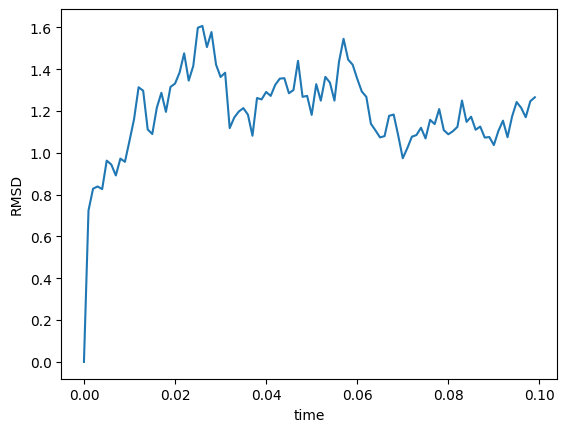

In [6]:
#@title Show the RMSD plot
# show the data in frame (you can change the axes values as needed)
fig, ax = pp.subplots()
ax.plot(rmsd_df['time']/1000, rmsd_df['Backbone'])
ax.set(xlabel = 'time', ylabel = 'RMSD')

# save the plot
rmsdpp_file = os.path.join(workDir, 'outputs', 'rmsd_plot.png')
pp.savefig(rmsdpp_file)
pp.show()



---
## 3. Root Mean Square Fluctuation plot

The code below calculates the root mean square fluctuation, effectively determining how much motion each amino acid has during the simulation. It is similar to RMSD, except instead of examining positional differences in the entire structure over time, it specifies the movement/fluctuation of each residue during a simulation.



---



/usr/local/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:1000: DeprecationWarning: The `rmsf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


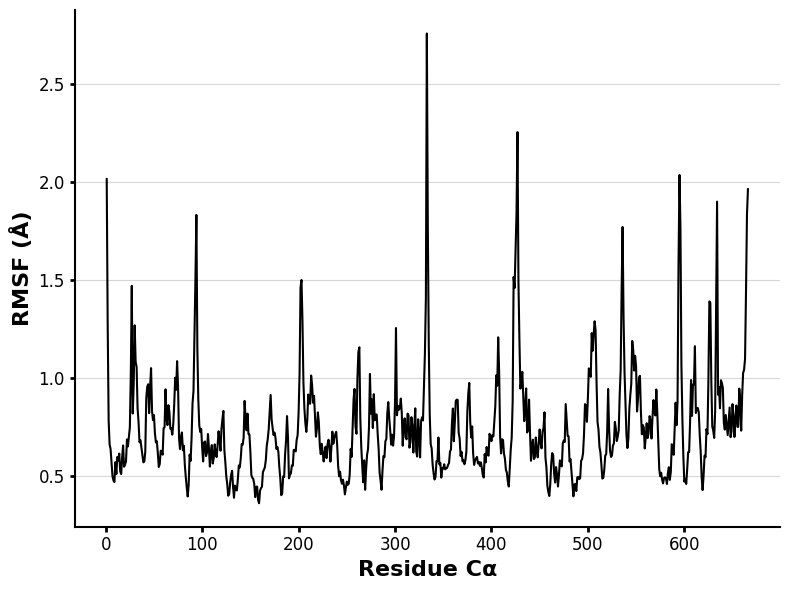

In [7]:
#@title Calculate the RMSF
# calculate the root mean square flucuation, effectively how much motion each amino acid has during the simulation
calphas = u.select_atoms("name CA") #Commonly the RMSD is computed using the aC of the protein to evaluate protein flucturation respecting the initial coordinates
rmsfer = rms.RMSF(calphas,verbose=False).run()
RMSF_table=pd.DataFrame(rmsfer.rmsf,index=calphas.resnums,columns=['RMSF']) #Saving the RMSF value for every aC residue
# save the data
rmsf_file = os.path.join(workDir, 'outputs', 'rmsf_df.csv')
RMSF_table.to_csv(rmsf_file)

# make the plot
pp.rcParams['axes.linewidth'] = 1.5
fig, ax = pp.subplots(figsize=(8,6))

pp.plot(calphas.resnums, rmsfer.rmsf,linewidth=1.5,color='k')

pp.xlabel ('Residue Cα',fontsize=16,fontweight='bold')
pp.ylabel ('RMSF (Å)',fontsize=16,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pp.tick_params ('both',width=2,labelsize=12)
pp.grid (axis='y',alpha=0.5)
pp.tight_layout()
rmsfpp_file = os.path.join(workDir, 'outputs', 'rmsf_plot.png')
pp.savefig(rmsfpp_file)
pp.show()
# save the plot


## 4. Predict pKa values
This takes a bit of time (20+ minutes). Produces a spreadsheet of pKa at each step in the trajectory for each amino acid side chain that typically ionizes under biological conditions. The amino acids are indicated by residue number in the protein, so it may not exactly match the sequence numbering if the simulation uses a distinct numbering scheme.
The describe cell gives a statical glimpse of the trajectory, while the save the data cell saves the entire set of data for plotting using another program.

**Make sure to only press PLAY once the previous run is complete!!**

In [8]:
#@title Predict the pKa values
pkatraj = PropkaTraj(u, select='protein', skip_failure=True)
pkatraj.run(step = 3)

/usr/local/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"


In [9]:
#@title Show the summary file
#  show the summary file
pkatraj.results.pkas.describe()

,1,2,5,17,21,31,32,41,50,55,...,644,646,650,651,654,655,656,657,661,666
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,7.896385,4.040884,11.884355,13.948490,14.812802,10.710635,3.451095,4.212676,4.238681,3.857084,...,10.140251,3.873680,10.629794,3.620187,4.505685,4.183115,10.432932,4.723680,4.594746,3.119772
std,0.109672,0.513291,0.222281,0.383943,0.979318,0.791943,0.504740,0.288924,0.067343,0.336471,...,0.424073,0.260373,0.323074,0.375352,0.389130,0.470182,0.386242,0.137590,0.183678,0.208958
min,7.692615,2.654808,11.466603,13.066172,11.707172,8.911224,2.804938,3.676892,4.088354,3.137003,...,9.625737,3.254171,10.401987,3.105934,3.361404,3.014602,9.698742,4.470723,4.054043,2.069316
25%,7.805208,3.739007,11.735948,13.641392,14.176072,10.192891,2.913256,4.020132,4.185537,3.597995,...,9.891389,3.790538,10.481117,3.377036,4.501726,3.975798,10.192515,4.621450,4.572981,3.119256
50%,7.923019,4.139309,11.961174,13.967529,14.712525,10.582723,3.813819,4.136331,4.232664,3.819179,...,9.993991,3.975848,10.533522,3.495296,4.618033,4.268380,10.301694,4.672336,4.634613,3.163006
75%,7.992261,4.471584,12.065171,14.283440,15.558527,11.469725,3.915198,4.369715,4.306988,4.097480,...,10.239530,4.050256,10.574978,3.680991,4.713716,4.418306,10.707163,4.842802,4.721808,3.208081
max,8.033917,4.534835,12.147594,14.495508,16.476418,11.545089,3.952544,4.911819,4.350465,4.590074,...,11.234489,4.159020,11.530562,4.393237,4.929639,5.119986,11.225637,4.990437,4.794600,3.298746


In [10]:
#@title Save the pKa data
# save the pka data
pka_file = os.path.join(workDir, 'outputs', 'pkas_over_traj.csv')
pkatraj.results.pkas.to_csv(pka_file)

# save pkatraj.results.pkas.describe() file to csv
des_df = pkatraj.results.pkas.describe()
des_file = os.path.join(workDir, 'outputs', 'pkas_describe.csv')
des_df.to_csv(des_file)

**For this next section, you will need to change the "xxx" at the end of the line of code in the brackets to the number of the specific amino acid you would like to look at.** For example, if you want to look at the trajectory of amino acid 176, put that into the [ ]. If you have an error message show up, make sure that the amino acid number is present in your "pkas_over_traj.csv" file (you should see a column with that number). This will allow you to see differences in the amino acid that you have decided to change for your variant protein!

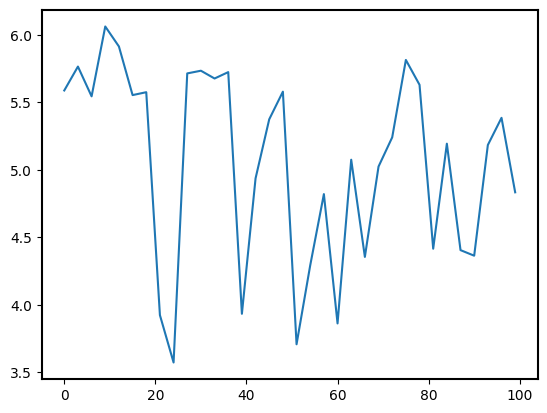

In [14]:
# to see one specific amino acid over the trajectory use the code below
# change the number in the [] to be the amino acid number in the structure, remember the numbering may be different so check the numbering in the pdb file
pp.plot(pkatraj.results.pkas.index,pkatraj.results.pkas[186])

<Axes: >

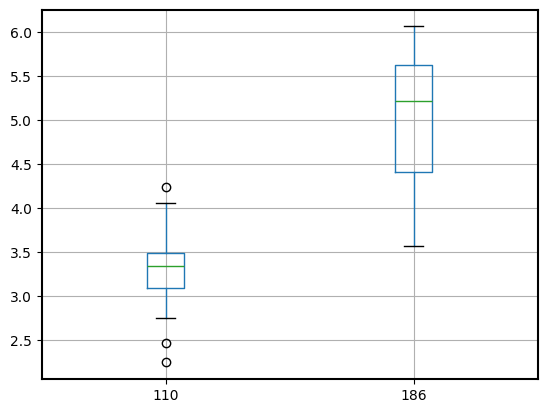

In [20]:

# to see multiple columns as a boxplot
#replace xxx, yyy, zzz with the specific amino acid numbers. You can add more names by adding commas between each new number.
df = pkatraj.results.pkas[[110, 186]]
# results will be in the form of a boxplot
df.boxplot()

# Congrats, you have finished Step 2 of the MD Colab! :-)

